<a href="https://colab.research.google.com/github/hitcaff/GLOBAL-TERRORISM-ANALYSIS/blob/main/Hitesh_Srivastava__Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -  Global Terrorism Database EDA**


###Project Type - EDA
###Contribution - Individual

## The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>



# Problem Statement

We all have heard and read about terrorism. Though it's apalling but it has been there since a very long time. The simplest definition of terrorism goes like:
 "The calculated use of unlawful violence or threat of unlawful violence to inculcate fear; intended to coerce or to intimidate governments or societies in the pursuit of goals that are generally political, religious, or ideological. "
 Reference: https://dema.az.gov/sites/default/files/Publications/AR-Terrorism%20Definitions-BORUNDA.pdf

 Data has always been there but to use data in order to imrpove everything around us, is a field that has found it's way recently. I wish, actually everyone wishes, that there was less data about terrorism but unfortunately that's not true. 
 
 So, when there is data about terrorism we should try to use it against it. 
 I think that this data which I am going to work upon is not enough to permanently conclude terrorism but let's see what we can find.
 " History is place to learn from! "
 There are a lot of industries that can use the dataset to achieve various business objectives such as Insurance companies, Investment companies, Travel Industry  et cetera

## Business Objective

Let's see which business objectives can be achieved from doing EDA on the dataset!

#General Guidelines : -

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]



#Let's Begin !

###**1. Know Your Data**

###Import Libraries

In [1]:
#Let's import the things we need for now

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px

from wordcloud import WordCloud
from scipy import signal
import plotly.graph_objects as go

import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings('ignore')



###Dataset Loading

In [2]:
!wget https://mydatt.s3.eu-north-1.amazonaws.com/Global+Terrorism+Data.zip

--2023-04-15 10:43:12--  https://mydatt.s3.eu-north-1.amazonaws.com/Global+Terrorism+Data.zip
Resolving mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)... 3.5.216.152
Connecting to mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)|3.5.216.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30321313 (29M) [application/zip]
Saving to: ‘Global+Terrorism+Data.zip’

Global+Terrorism+Da 100%[===================>]  28.92M  14.1MB/s    in 2.1s    

2023-04-15 10:43:14 (14.1 MB/s) - ‘Global+Terrorism+Data.zip’ saved [30321313/30321313]



In [3]:
!unzip Global+Terrorism+Data.zip

Archive:  Global+Terrorism+Data.zip
  inflating: Copy of Global Terrorism Data.csv  


In [4]:
terror_df = pd.read_csv('/content/Copy of Global Terrorism Data.csv', encoding='ISO-8859-1')

####Dataset First View

In [5]:
pd.set_option('display.max_columns', None)
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

####Dataset Rows & Columns count

In [6]:
terror_df.shape

(181691, 135)

####Dataset Information

In [7]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


####Duplicate Values

In [8]:
len(terror_df[terror_df.duplicated()])

0

In [9]:
#checking the dataset for null values
terror_df.isnull().sum().sort_values(ascending=False)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
suicide                  0
success                  0
crit3                    0
property                 0
eventid                  0
Length: 135, dtype: int64

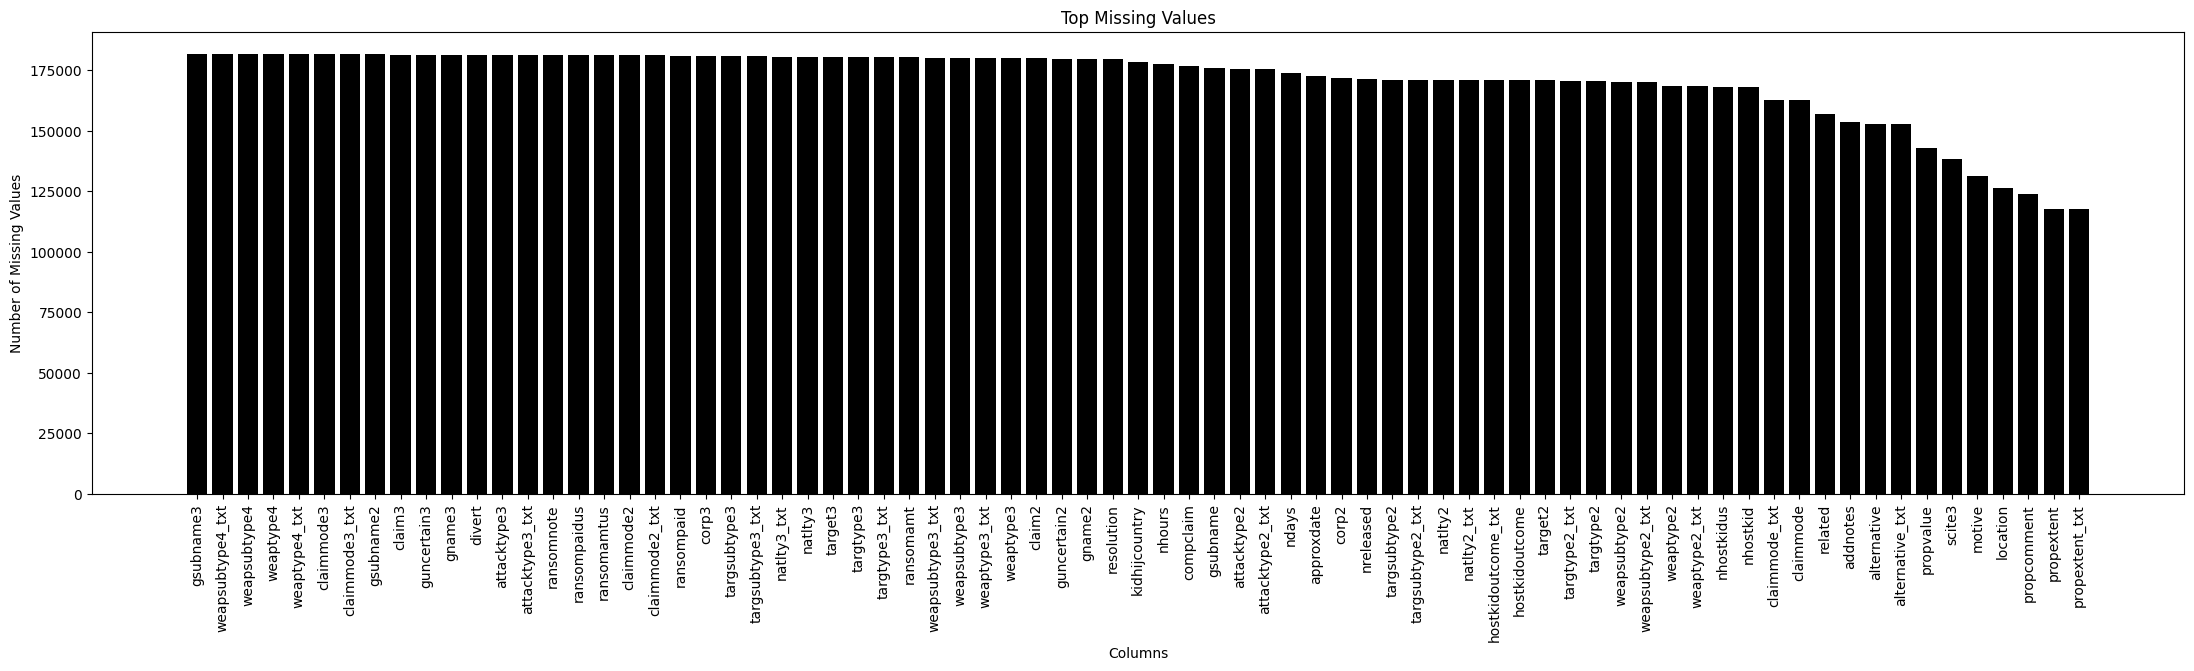

In [10]:
# Create a bar chart of the top missing values
missing_values = terror_df.isnull().sum().sort_values(ascending=False).head(75)
fig, ax = plt.subplots(figsize=(27, 6))
ax.bar(missing_values.index, missing_values.values, color='black')
ax.set_title('Top Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Removing columns having null values more than 50%
# Creating dataframe without null values

df_wo_null = terror_df[terror_df.columns[terror_df.isnull().mean() < 0.5]]
df_wo_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [12]:
#creating a dataframe with only important columns for analysis
df_wo_null = df_wo_null[['iyear', 'imonth', 'extended', 'country_txt', 
                        'region_txt', 'city', 'latitude','longitude', 
                         'targtype1_txt', 'crit1', 'crit2', 'crit3', 'success', 
                         'suicide', 'attacktype1_txt',  'target1', 'gname',
                         'weaptype1_txt', 'nkill', 'nwound', 'property']]

###What did you know about your dataset?

Answer :

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df_wo_null.columns

Index(['iyear', 'imonth', 'extended', 'country_txt', 'region_txt', 'city',
       'latitude', 'longitude', 'targtype1_txt', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1_txt', 'target1', 'gname',
       'weaptype1_txt', 'nkill', 'nwound', 'property'],
      dtype='object')

In [14]:
# Dataset Describe
df_wo_null.describe()

,iyear,imonth,extended,latitude,longitude,crit1,crit2,crit3,success,suicide,nkill,nwound,property
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,0.045346,23.498343,-4.586957e+02,0.988530,0.993093,0.875668,0.889598,0.036507,2.403272,3.167668,-0.544556
std,13.259430,3.388303,0.208063,18.569242,2.047790e+05,0.106483,0.082823,0.329961,0.313391,0.187549,11.545741,35.949392,3.122889
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,0.000000,11.510046,4.545640e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,31.467463,4.324651e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,0.000000,34.685087,6.871033e+01,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,1.000000


In [15]:
# Renaming important columns
df_wo_null.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'city': 'City',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'attacktype1_txt': 'Attack_Type1',
    'targtype1_txt': 'Target_Type1',
    'weaptype1_txt': 'Weapon_Type1',
    'nkill': 'Fatalities',
    'gname': 'Group Name',
    'nwound': 'Injuries'}, inplace=True)

# Print the updated column names
print(df_wo_null.columns)

Index(['Year', 'Month', 'extended', 'Country', 'Region', 'City', 'Latitude',
       'Longitude', 'Target_Type1', 'crit1', 'crit2', 'crit3', 'success',
       'suicide', 'Attack_Type1', 'target1', 'Group Name', 'Weapon_Type1',
       'Fatalities', 'Injuries', 'property'],
      dtype='object')


### Variables Description

Answer:

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df_wo_null.columns.tolist():
  print("No. of unique values in ",i,"is",df_wo_null[i].nunique(),".")

No. of unique values in  Year is 47 .
No. of unique values in  Month is 13 .
No. of unique values in  extended is 2 .
No. of unique values in  Country is 205 .
No. of unique values in  Region is 12 .
No. of unique values in  City is 36674 .
No. of unique values in  Latitude is 48322 .
No. of unique values in  Longitude is 48039 .
No. of unique values in  Target_Type1 is 22 .
No. of unique values in  crit1 is 2 .
No. of unique values in  crit2 is 2 .
No. of unique values in  crit3 is 2 .
No. of unique values in  success is 2 .
No. of unique values in  suicide is 2 .
No. of unique values in  Attack_Type1 is 9 .
No. of unique values in  target1 is 86006 .
No. of unique values in  Group Name is 3537 .
No. of unique values in  Weapon_Type1 is 12 .
No. of unique values in  Fatalities is 205 .
No. of unique values in  Injuries is 238 .
No. of unique values in  property is 3 .


## 3. ***Data Wrangling***

In [17]:
# looking at the attacks by cities
df_wo_null['City'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: City, Length: 36674, dtype: int64

In [18]:
# Saving the cities to another variable without the 'unknown' cities
attack_cities = df_wo_null.City.value_counts()[1:15]
attack_cities


Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: City, dtype: int64

In [19]:
#Making a new column to find the affected people

df_wo_null['Affected'] = df_wo_null['Fatalities'] + df_wo_null['Injuries']


In [20]:
# filter the data where crit1, crit2, and crit3 are equal to 1
crit_data = df_wo_null[(df_wo_null['crit1']==1) & (df_wo_null['crit2']==1) & (df_wo_null['crit3']==1)]

# group the data by country
country_data = crit_data.groupby('Country').size().reset_index(name='counts')
country_data = country_data.sort_values(by=['counts'], ascending=False).reset_index(drop=True)

In [21]:
#creating a dataframe with attacks that were extended
extended_data = df_wo_null[df_wo_null['extended'] == 1]

# Counting the number of extended attacks by country
extended_count = extended_data['Country'].value_counts().reset_index()

# Renaming the columns of the count dataframe
extended_count.columns = ['Country', 'Number of Extended Attacks']

# Sorting the count dataframe in descending order
extended_count = extended_count.sort_values('Number of Extended Attacks', ascending=False)

print(extended_count[:20])

                             Country  Number of Extended Attacks
0                        Afghanistan                         925
1                              India                         782
2                               Iraq                         685
3                           Pakistan                         673
4                           Colombia                         628
5                            Nigeria                         430
6                        Philippines                         429
7                              Libya                         393
8                              Yemen                         328
9                            Somalia                         265
10                             Sudan                         259
11  Democratic Republic of the Congo                         222
12                             Syria                         222
13                           Ukraine                         111
14                       

### What all manipulations have you done and insights you found?

Answer:

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [22]:
df_wo_null['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

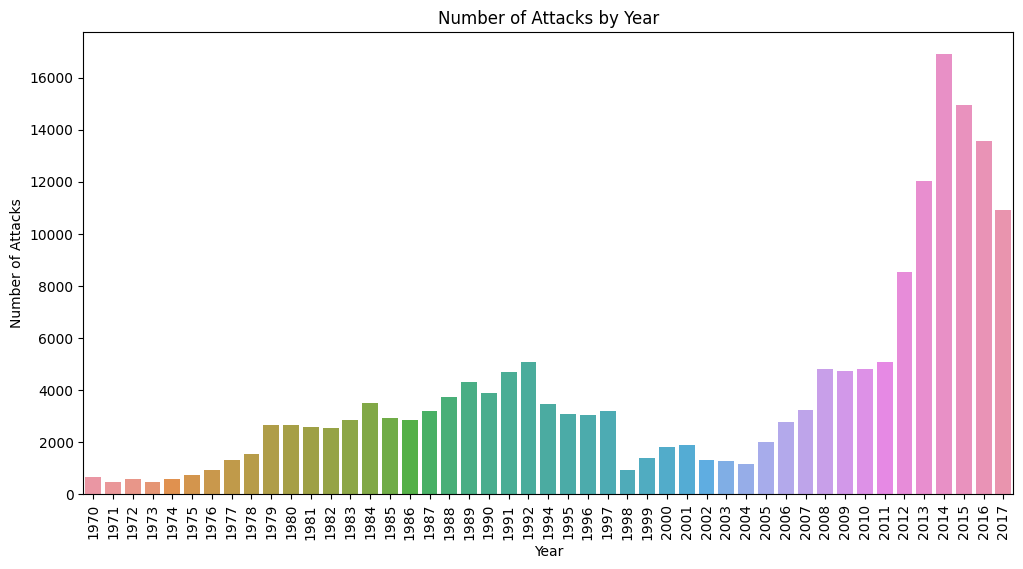

In [23]:
#Let's dive into analysis by exploring variables, one at a time.
# Number of attacks by year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df_wo_null)
plt.xticks(rotation=90)
plt.title('Number of Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [24]:
#Let's see the percentage of attacks 
attacks_filter = df_wo_null[(df_wo_null['Year'] >= 2008) & (df_wo_null['Year'] <= 2017)]
percentage_of_attacks = len(attacks_filter) / len(df_wo_null) * 100
print(f"The percentage of attacks that happened between 2008 and 2017 is {percentage_of_attacks:.2f}%,.")

The percentage of attacks that happened between 2008 and 2017 is 53.02%,.


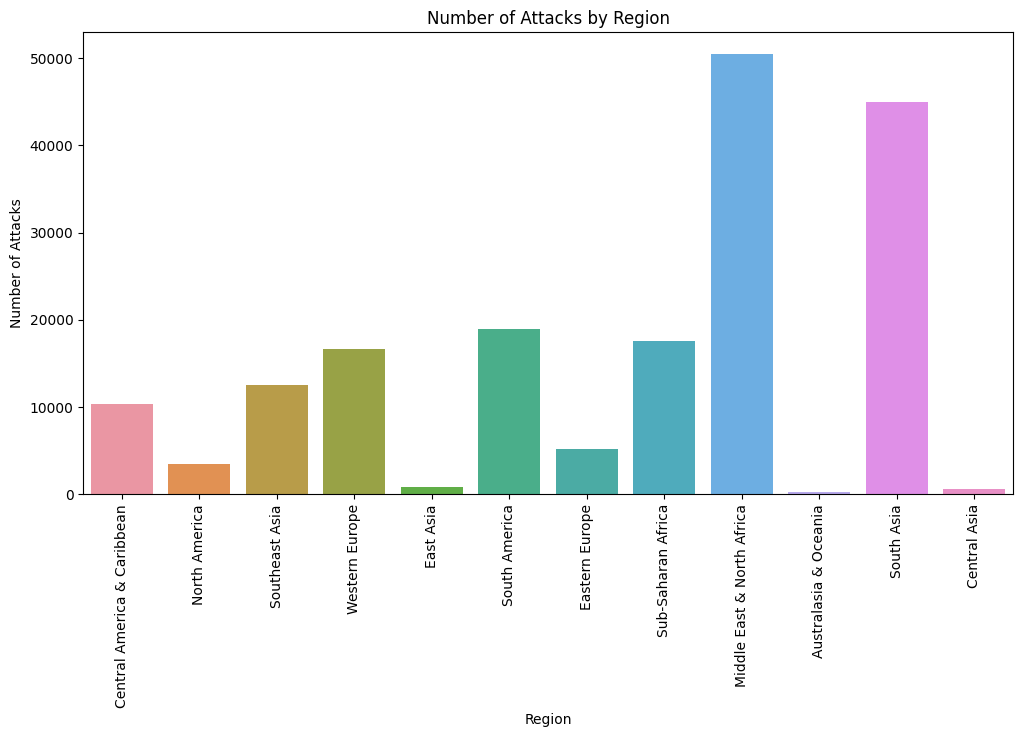

In [25]:
# Number of attacks by region
plt.figure(figsize=(12,6))
sns.countplot(x='Region', data=df_wo_null)
plt.xticks(rotation=90)
plt.title('Number of Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.show()

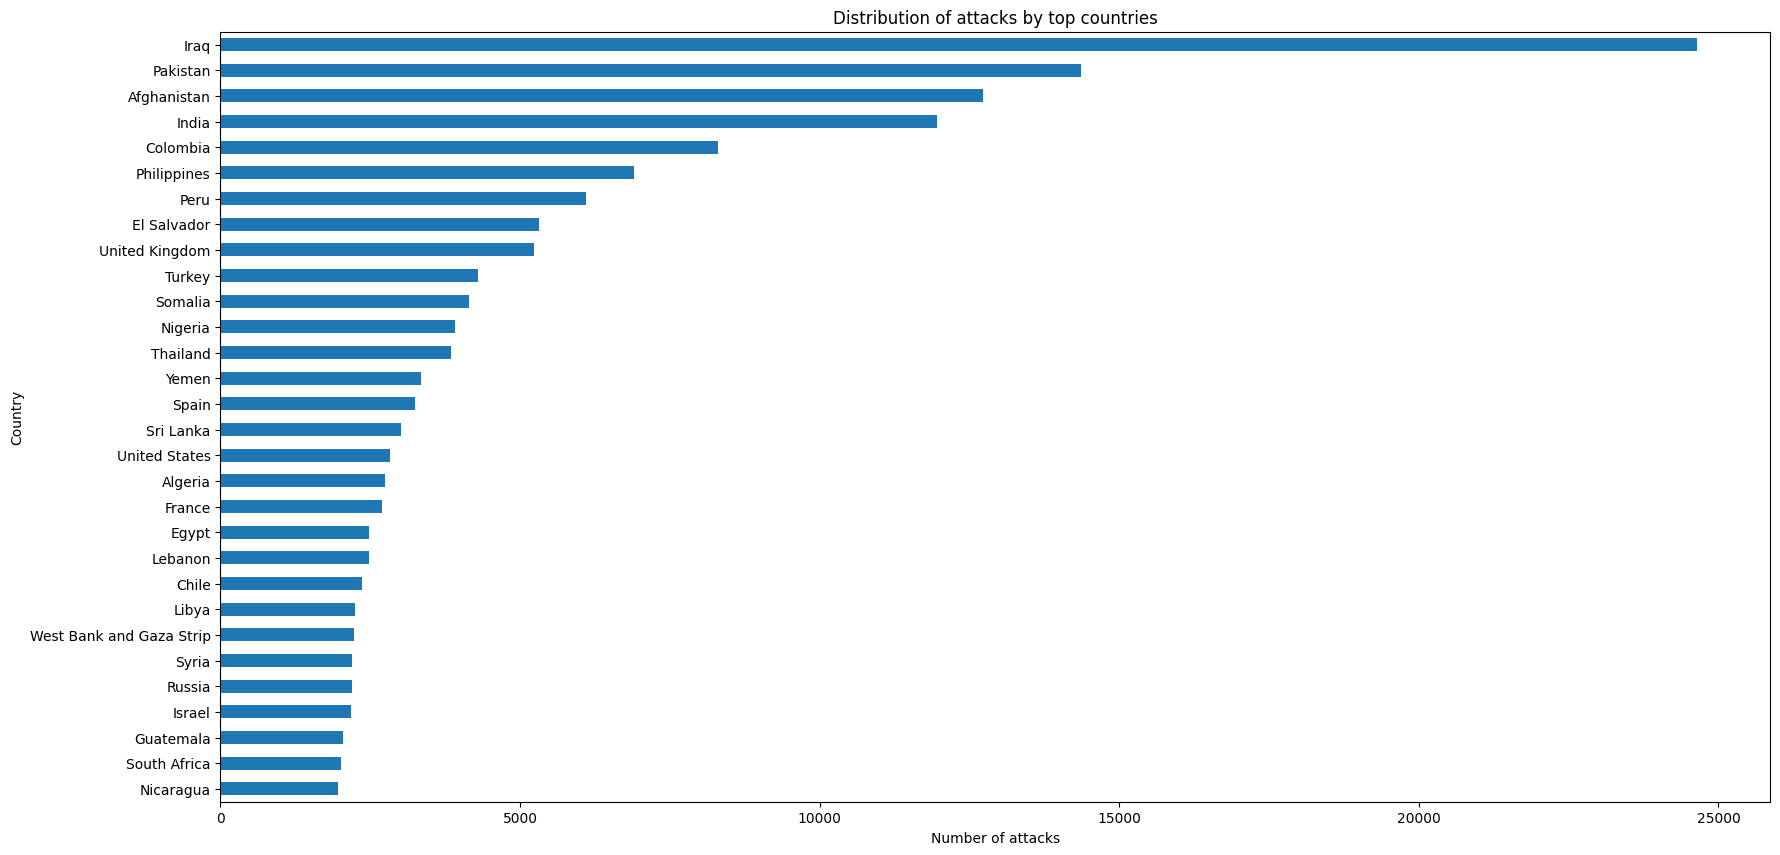

In [26]:
# Number of attacks by country(only a few)
attacks_by_country = df_wo_null['Country'].value_counts().head(30).sort_values(ascending=True)
attacks_by_country.plot(kind='barh', figsize=(20,10))
plt.title('Distribution of attacks by top countries')
plt.xlabel('Number of attacks')
plt.ylabel('Country')
plt.show()

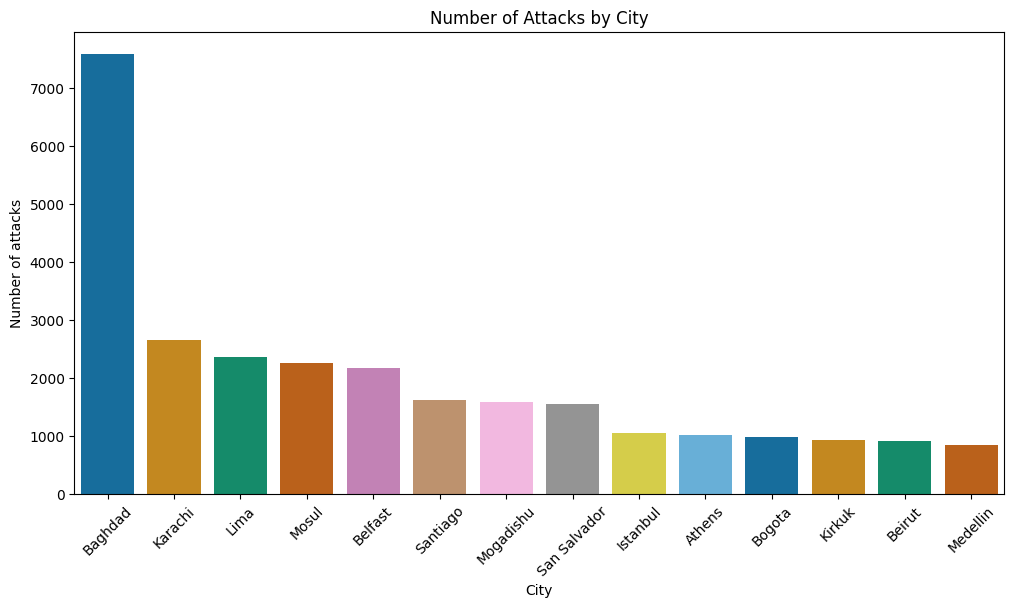

In [27]:
# Number of attacks by cities


# which city faced highest number of attacks
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_cities.index, y=attack_cities.values, palette="colorblind")
plt.title('Number of Attacks by City')
plt.xlabel('City')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

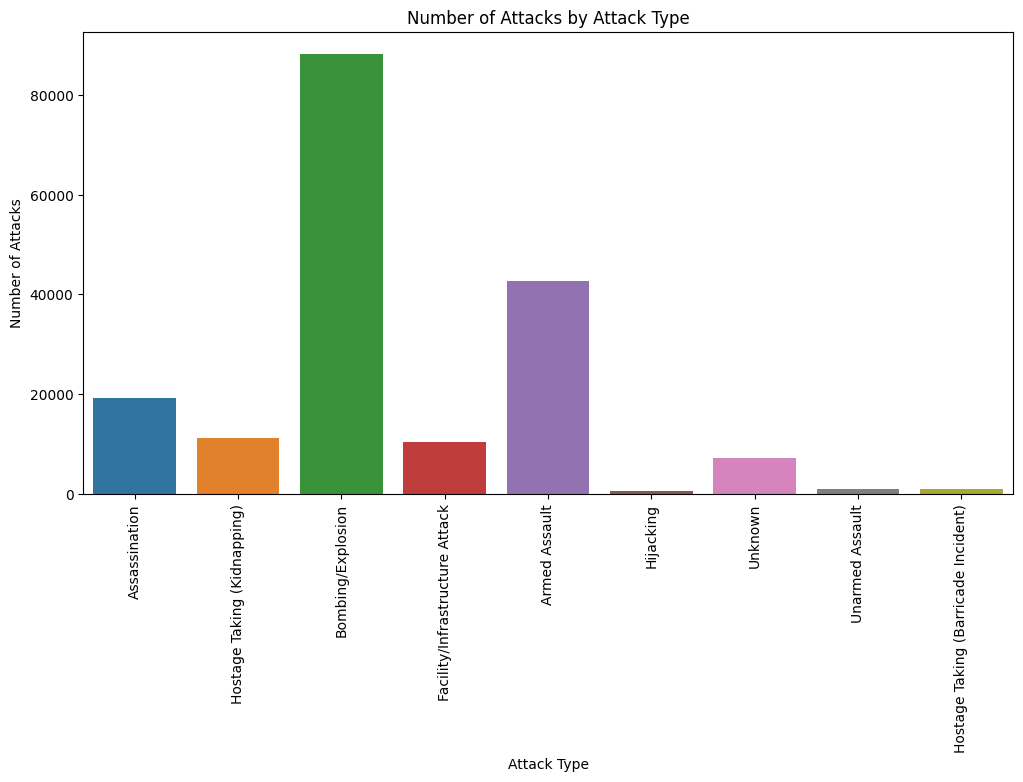

In [28]:
#Number of attacks by attack type

plt.figure(figsize=(12,6))
sns.countplot(x='Attack_Type1', data=df_wo_null)
plt.xticks(rotation=90)
plt.title('Number of Attacks by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

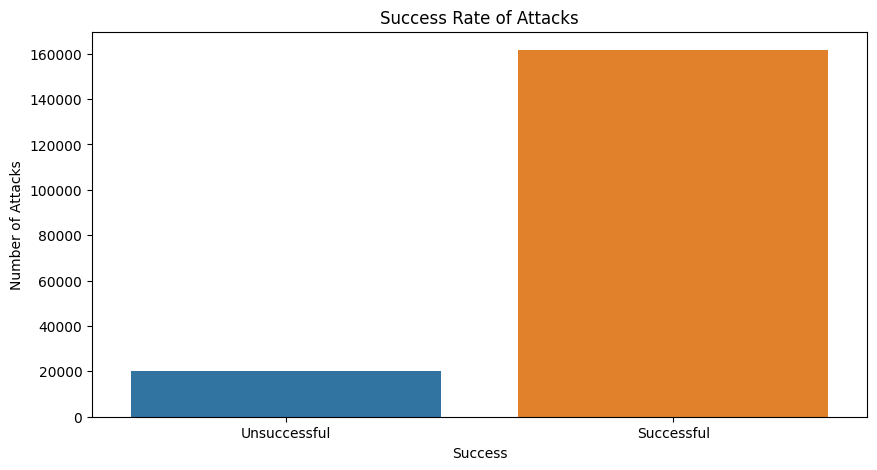

In [29]:
# Success rate of attacks

plt.figure(figsize=(10,5))
sns.countplot(x='success', data=df_wo_null)
plt.xticks([0, 1], ['Unsuccessful', 'Successful'])
plt.title('Success Rate of Attacks')
plt.xlabel('Success')
plt.ylabel('Number of Attacks')
plt.show()

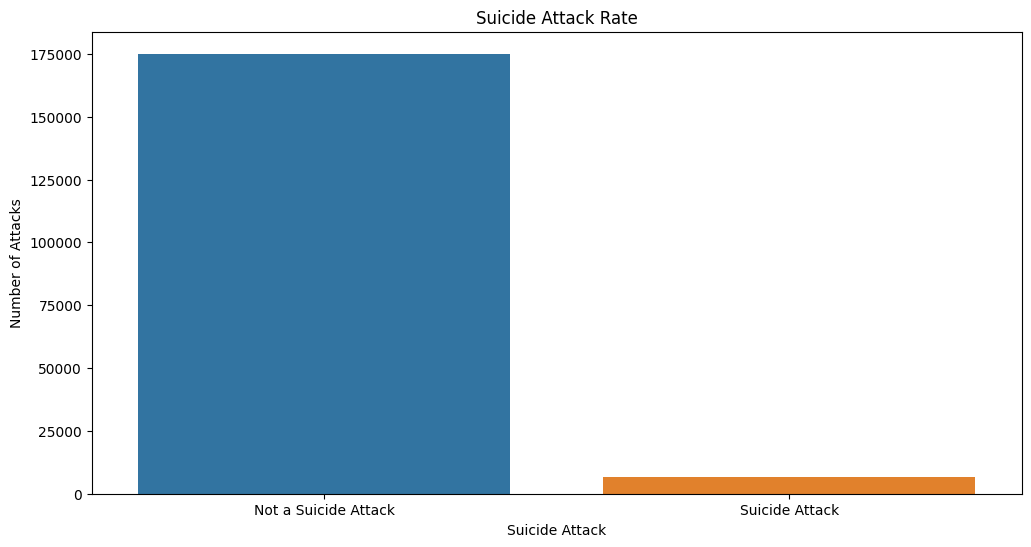

In [30]:
# Suicide attack rate

plt.figure(figsize=(12,6))
sns.countplot(x='suicide', data=df_wo_null)
plt.xticks([0, 1], ['Not a Suicide Attack', 'Suicide Attack'])
plt.title('Suicide Attack Rate')
plt.xlabel('Suicide Attack')
plt.ylabel('Number of Attacks')
plt.show()

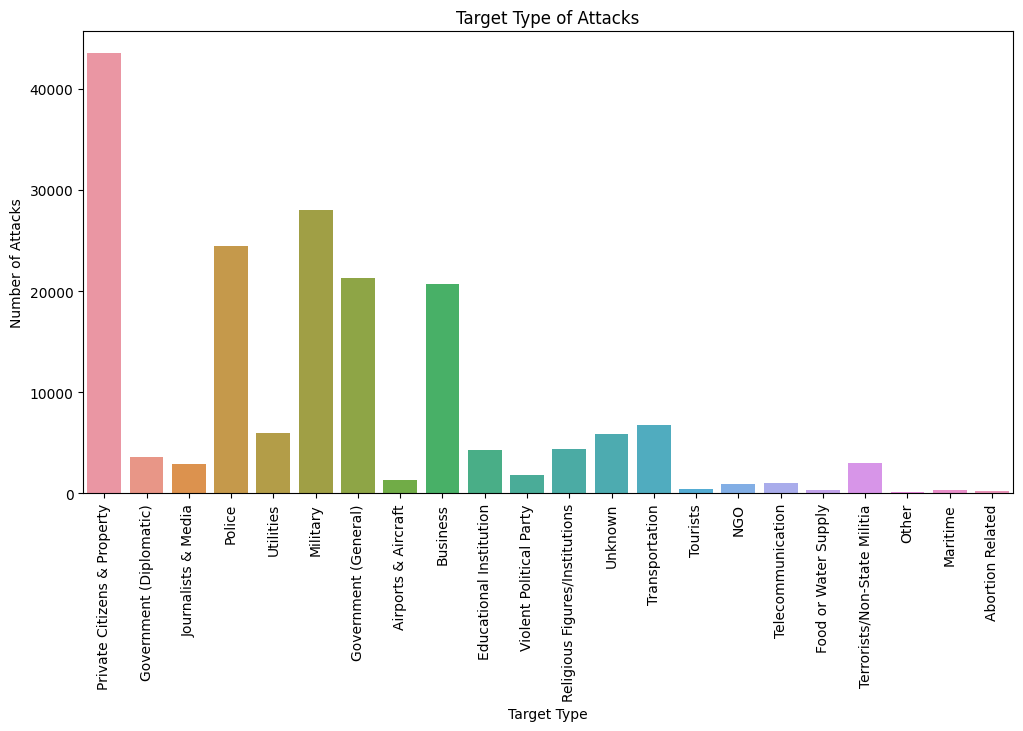

In [31]:
# Target type of attacks

plt.figure(figsize=(12,6))
sns.countplot(x='Target_Type1', data=df_wo_null)
plt.xticks(rotation=90)
plt.title('Target Type of Attacks')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.show()

In [32]:
df_wo_null['Weapon_Type1'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

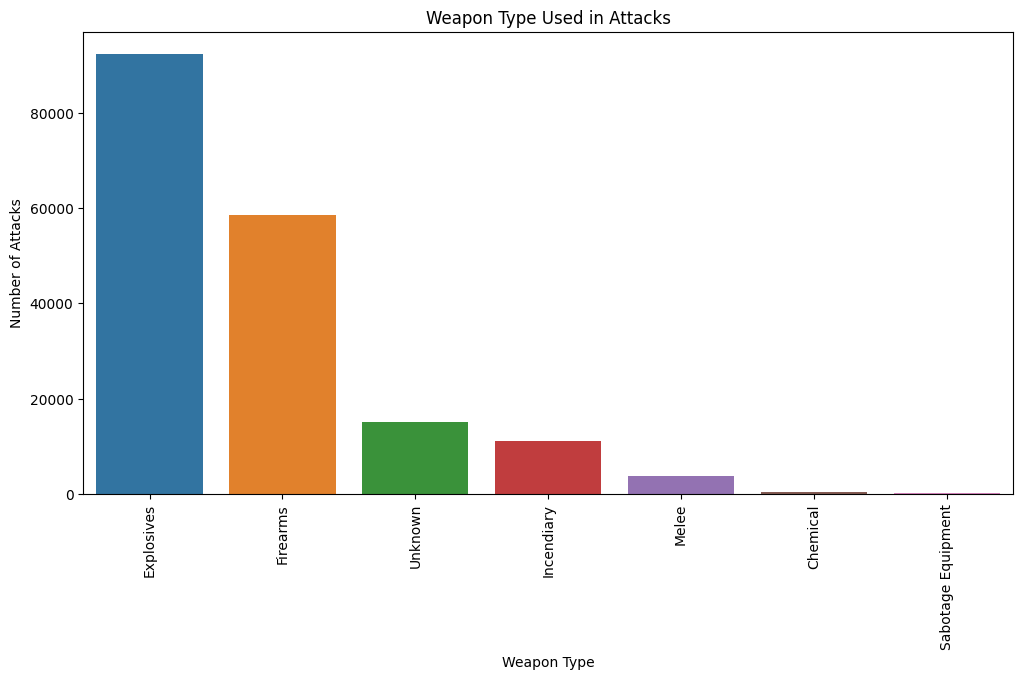

In [33]:
# Weapon type used in attacks

plt.figure(figsize=(12,6))
sns.countplot(x=df_wo_null['Weapon_Type1'], order=df_wo_null['Weapon_Type1'].value_counts().iloc[:7].index)
plt.xticks(rotation=90)
plt.title('Weapon Type Used in Attacks')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.show()


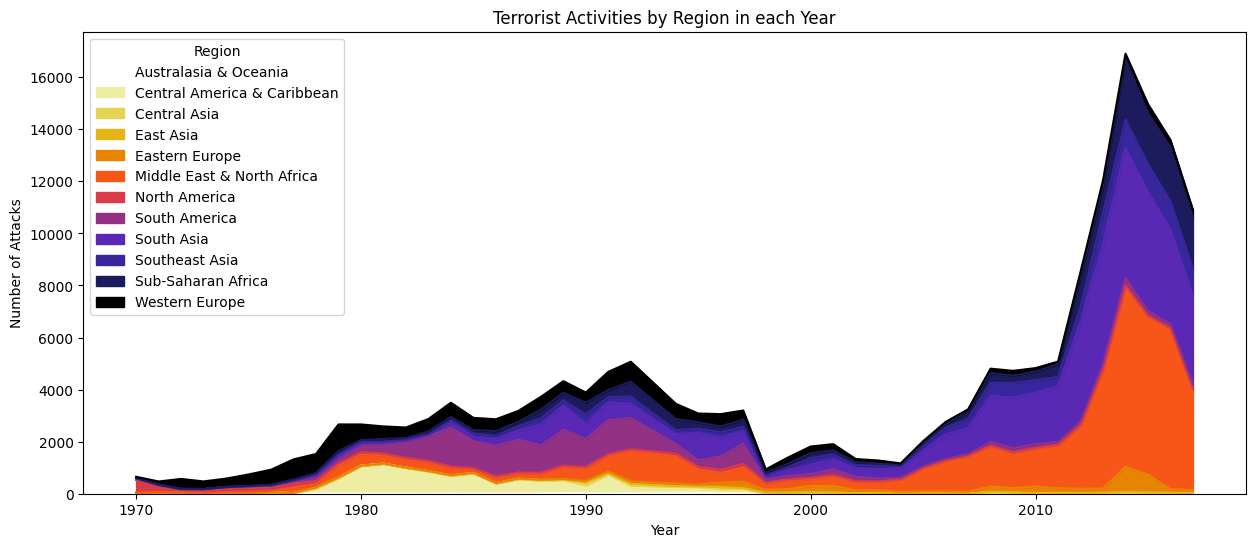

In [34]:
#Terrorist Activities in each Year by Regions

pd.crosstab(df_wo_null.Year, df_wo_null.Region).plot(kind='area',figsize=(15,6),colormap="CMRmap_r")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

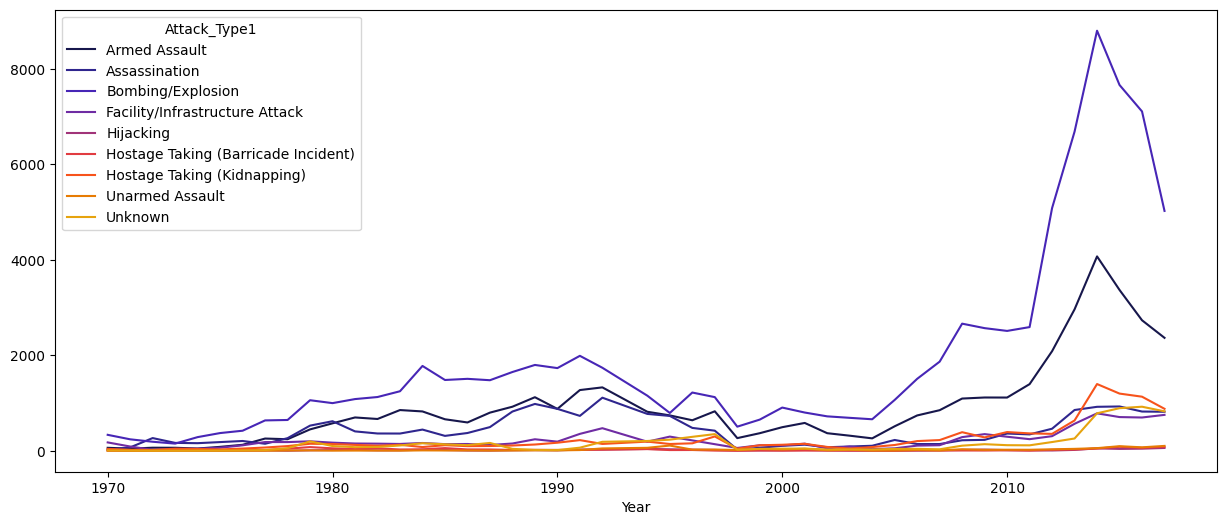

In [35]:
terror_attack = pd.crosstab(df_wo_null['Year'], df_wo_null['Attack_Type1'])
terror_attack.plot(color = sns.color_palette('CMRmap', 12))
fig = plt.gcf()
fig.set_size_inches(15, 6)

affected by city, country, year, number of killed, injured


In [36]:
# top 20 countries with most number of kills 

country_killed = df_wo_null.groupby('Country').sum()['Fatalities']
top_20 = country_killed.sort_values(ascending=False)[:20]
print(top_20)

Country
Iraq                                78589.0
Afghanistan                         39384.0
Pakistan                            23822.0
Nigeria                             22682.0
India                               19341.0
Sri Lanka                           15530.0
Syria                               15229.0
Colombia                            14698.0
Peru                                12771.0
El Salvador                         12053.0
Algeria                             11066.0
Nicaragua                           10598.0
Somalia                             10273.0
Philippines                          9559.0
Yemen                                8776.0
Turkey                               6888.0
Guatemala                            5167.0
Russia                               4308.0
Burundi                              4205.0
Democratic Republic of the Congo     4069.0
Name: Fatalities, dtype: float64


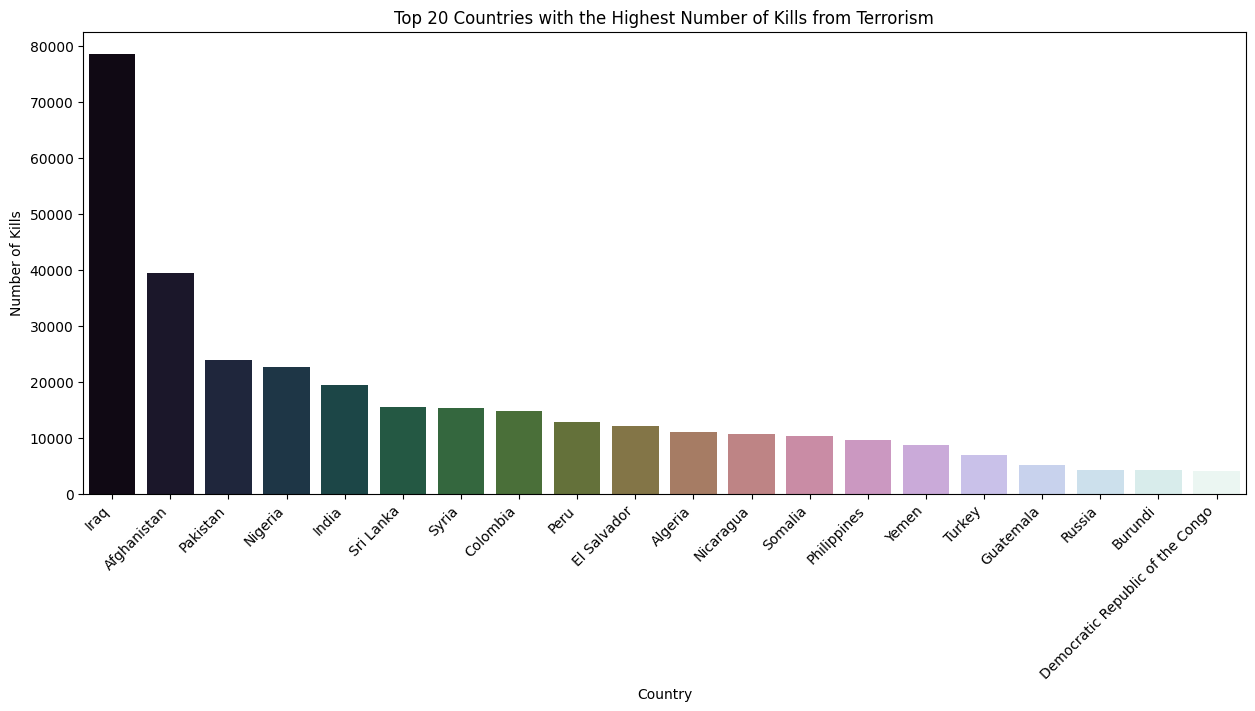

In [37]:
# Creating a dataframe of total kills by country
kills_by_country = df_wo_null.groupby('Country')['Fatalities'].sum().reset_index()

# Sorting the dataframe in descending order of total kills
kills_by_country = kills_by_country.sort_values('Fatalities', ascending=False)

top_20_kills_by_country = kills_by_country.head(20)

# Creating a bar chart of total kills by country
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Fatalities', data=top_20_kills_by_country, palette='cubehelix')
plt.title('Top 20 Countries with the Highest Number of Kills from Terrorism')
plt.xlabel('Country')
plt.ylabel('Number of Kills')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
kills_by_city  = df_wo_null.groupby('City').sum()['Fatalities']
top_20_kills_by_city = kills_by_city.sort_values(ascending=False)[:20]
print(top_20_kills_by_city)

City
Unknown          22647.0
Baghdad          21151.0
Mosul             7140.0
Mogadishu         3913.0
Karachi           3688.0
New York City     2838.0
Tikrit            2679.0
Kabul             2493.0
Ramadi            2313.0
Maiduguri         2235.0
Aleppo            2125.0
Beirut            1916.0
Fallujah          1837.0
Baqubah           1779.0
Quetta            1748.0
Peshawar          1634.0
Kirkuk            1628.0
Colombo           1386.0
Belfast           1354.0
Damascus          1344.0
Name: Fatalities, dtype: float64


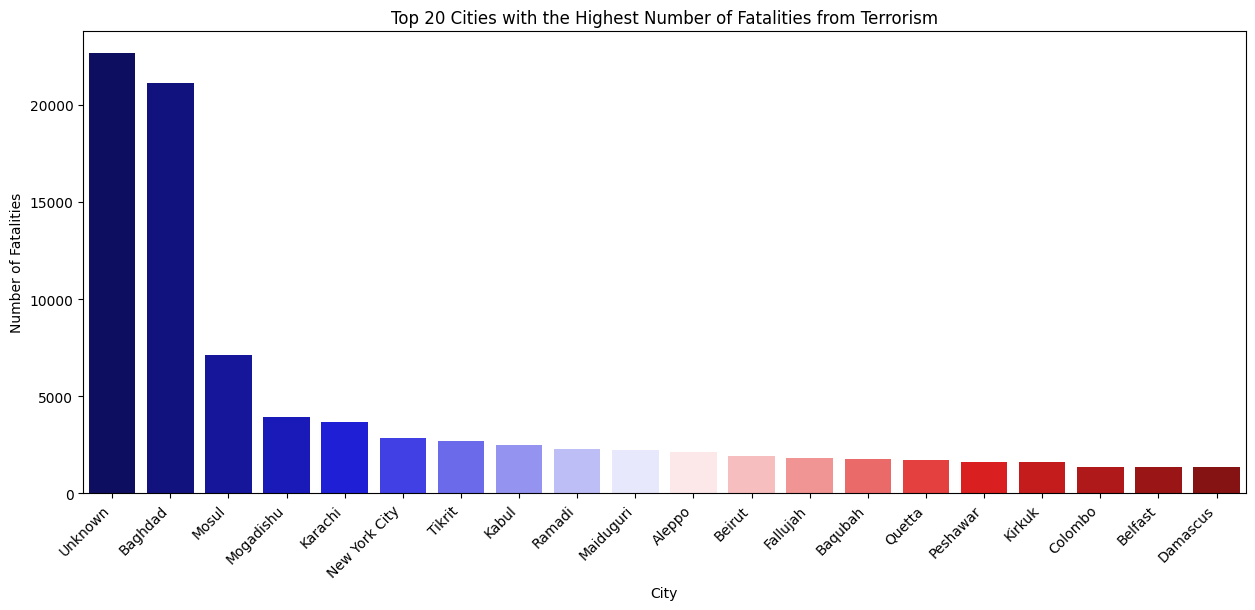

In [39]:

plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_kills_by_city.index, y=top_20_kills_by_city.values, palette='seismic')
plt.title('Top 20 Cities with the Highest Number of Fatalities from Terrorism')
plt.xlabel('City')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
# number of people killed by years

year_killed = df_wo_null.groupby('Year').sum()['Fatalities']
top_20_year = year_killed.sort_values(ascending=False)[:20]
print(top_20_year)

Year
2014    44490.0
2015    38853.0
2016    34871.0
2017    26445.0
2013    22273.0
2012    15497.0
2007    12824.0
1997    10924.0
1984    10450.0
1992     9742.0
1983     9444.0
2006     9380.0
2009     9273.0
2008     9157.0
1991     8429.0
2011     8246.0
1989     8152.0
2010     7827.0
2001     7729.0
1994     7690.0
Name: Fatalities, dtype: float64


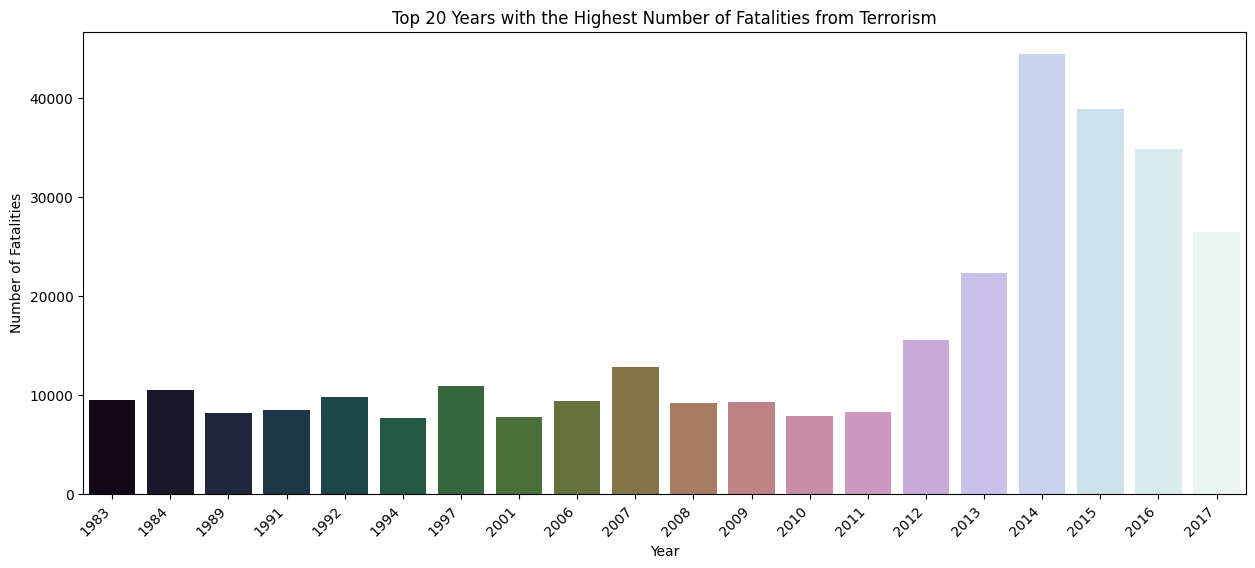

In [41]:
# visualizing the number of people killed by years

# Creating a bar chart of total kills by year
plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_year.index, y=top_20_year.values, palette='cubehelix')
plt.title('Top 20 Years with the Highest Number of Fatalities from Terrorism')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
# number of injured in countries 

country_injured = df_wo_null.groupby('Country').sum()['Injuries']
top_20 = country_injured.sort_values(ascending=False)[:20]
print(top_20)

Country
Iraq             134690.0
Afghanistan       44277.0
Pakistan          42038.0
India             28980.0
United States     20702.0
Sri Lanka         15561.0
Syria             14109.0
Philippines       13367.0
Lebanon           10904.0
Colombia          10328.0
Nigeria           10239.0
Turkey             9899.0
Yemen              9328.0
Algeria            9150.0
Somalia            8875.0
Bangladesh         8225.0
Israel             7946.0
Thailand           7818.0
Russia             7441.0
Japan              6998.0
Name: Injuries, dtype: float64


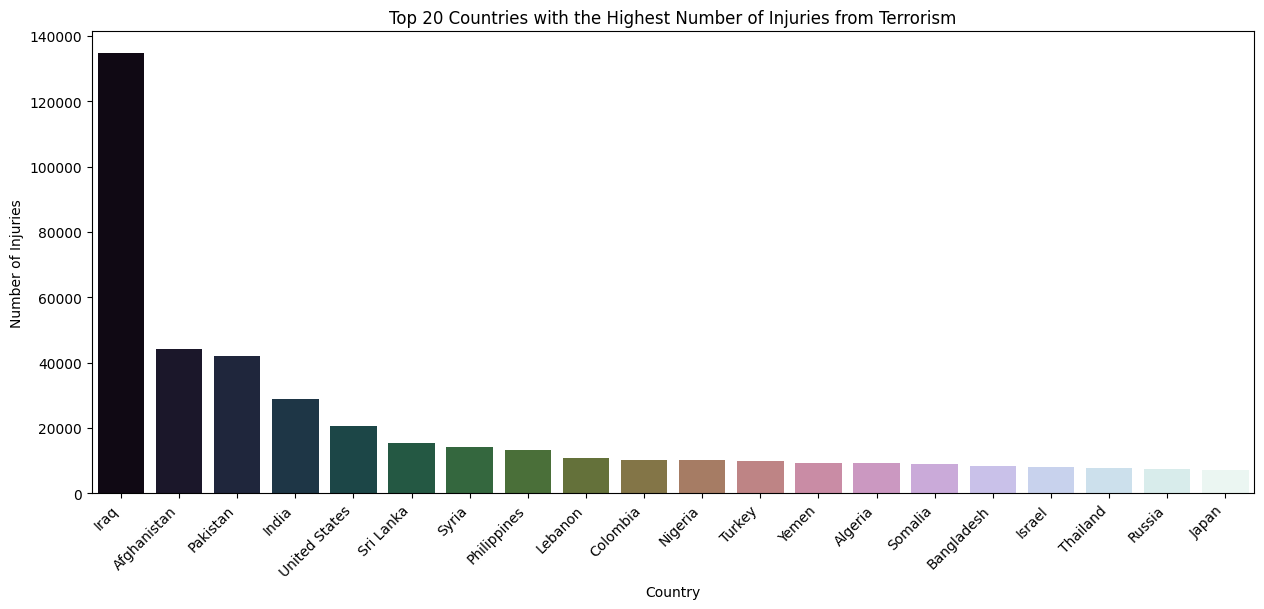

In [43]:
# Creating a dataframe of total injuries by country
injuries_by_country = df_wo_null.groupby('Country')['Injuries'].sum().reset_index()

# Sorting the dataframe in descending order of total injuries
injuries_by_country = injuries_by_country.sort_values('Injuries', ascending=False)

top_20_injuries_by_country = injuries_by_country.head(20)

# Creating a bar chart of total injuries by country
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Injuries', data=top_20_injuries_by_country, palette='cubehelix')
plt.title('Top 20 Countries with the Highest Number of Injuries from Terrorism')
plt.xlabel('Country')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
# top cities with injured people

city_injured = df_wo_null.groupby('City').sum()['Injuries']
top_20 = city_injured.sort_values(ascending=False)[:20]
print(top_20)

City
Baghdad          56725.0
New York City    16781.0
Unknown          12803.0
Kabul             5973.0
Mosul             5787.0
Karachi           5688.0
Tokyo             5542.0
Beirut            5341.0
Nairobi           5024.0
Kirkuk            5008.0
Mogadishu         4955.0
Colombo           4520.0
Peshawar          3938.0
Quetta            3842.0
Aleppo            3623.0
Baqubah           3340.0
Jerusalem         3235.0
Damascus          3184.0
Lahore            3171.0
Algiers           2979.0
Name: Injuries, dtype: float64


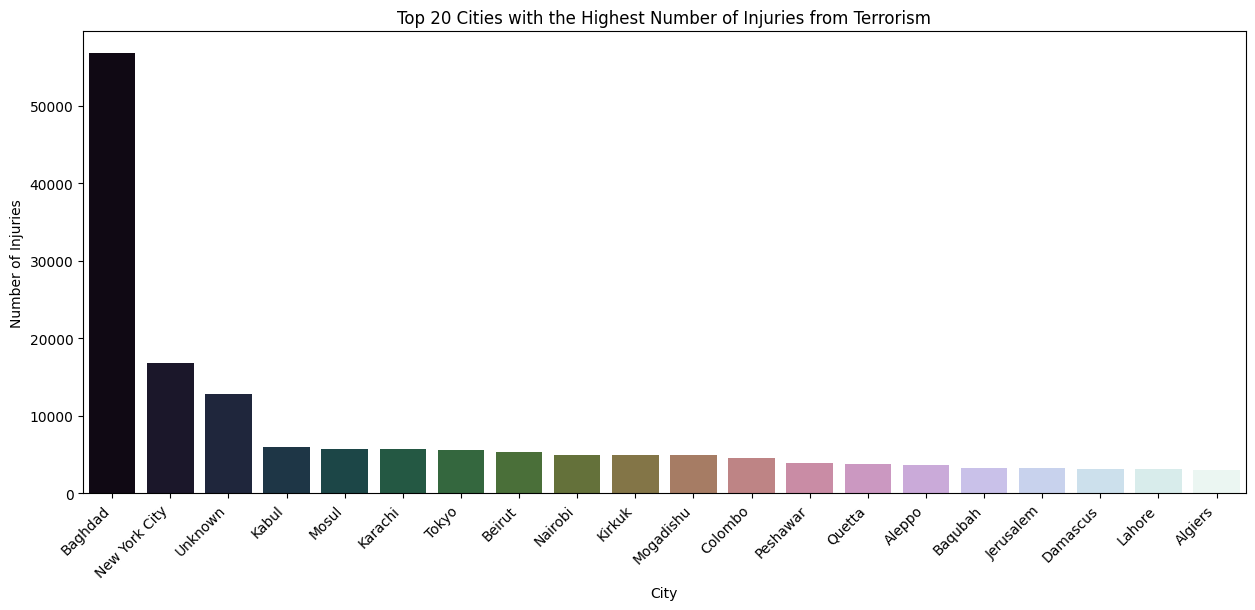

In [45]:
# visualizing cities by injuries

# Creating a dataframe of total injuries by city
injuries_by_city = df_wo_null.groupby('City')['Injuries'].sum().reset_index()
injuries_by_city = injuries_by_city.sort_values('Injuries', ascending=False)
top_20_injuries_by_city = injuries_by_city.head(20)

# Creating a bar chart of total injuries by city
plt.figure(figsize=(15, 6))
sns.barplot(x='City', y='Injuries', data=top_20_injuries_by_city, palette='cubehelix')
plt.title('Top 20 Cities with the Highest Number of Injuries from Terrorism')
plt.xlabel('City')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
# number of injured by year

year_injured = df_wo_null.groupby('Year').sum()['Injuries']
top_20_year = year_injured.sort_values(ascending=False)[:20]
print(top_20_year)

Year
2015    44043.0
2014    41128.0
2016    40001.0
2013    37688.0
2012    25445.0
2017    24927.0
2001    22774.0
2007    22524.0
2009    19138.0
2008    18998.0
2010    15947.0
2006    15550.0
2011    14659.0
1995    14292.0
2005    12784.0
2004    12022.0
1996    10795.0
1992     9915.0
1997     9072.0
1998     8183.0
Name: Injuries, dtype: float64


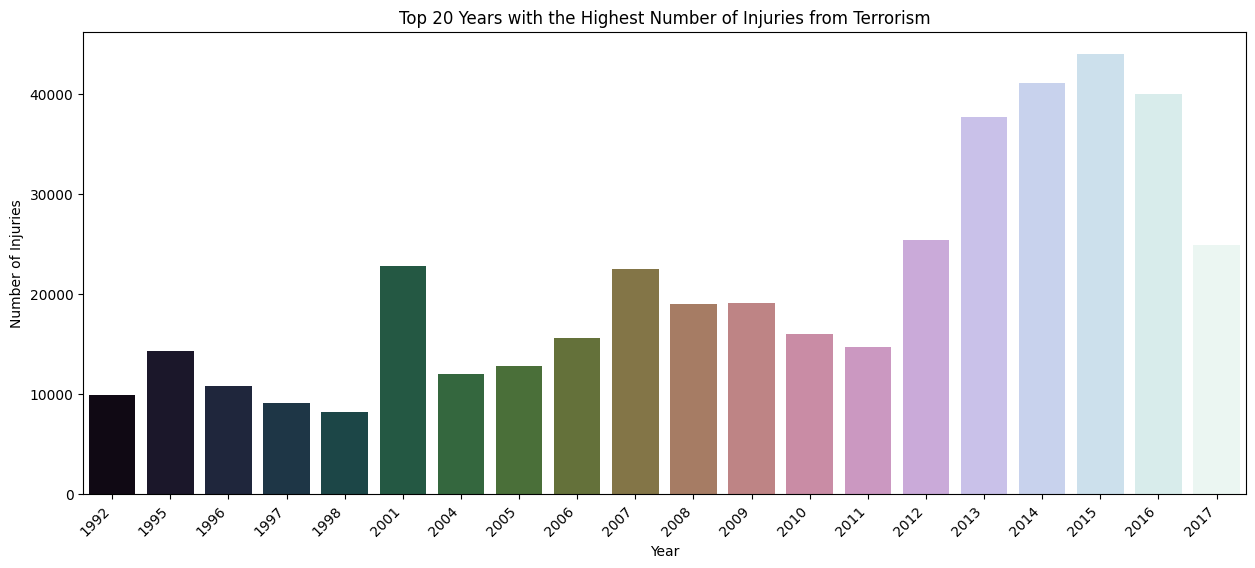

In [47]:
# visualizing for years

# Creating a dataframe of total injuries by year
injuries_by_year = df_wo_null.groupby('Year')['Injuries'].sum().reset_index()
injuries_by_year = injuries_by_year.sort_values('Injuries', ascending=False)
top_20_injuries_by_year = injuries_by_year.head(20)

plt.figure(figsize=(15, 6))
sns.barplot(x='Year', y='Injuries', data=top_20_injuries_by_year, palette='cubehelix')
plt.title('Top 20 Years with the Highest Number of Injuries from Terrorism')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()

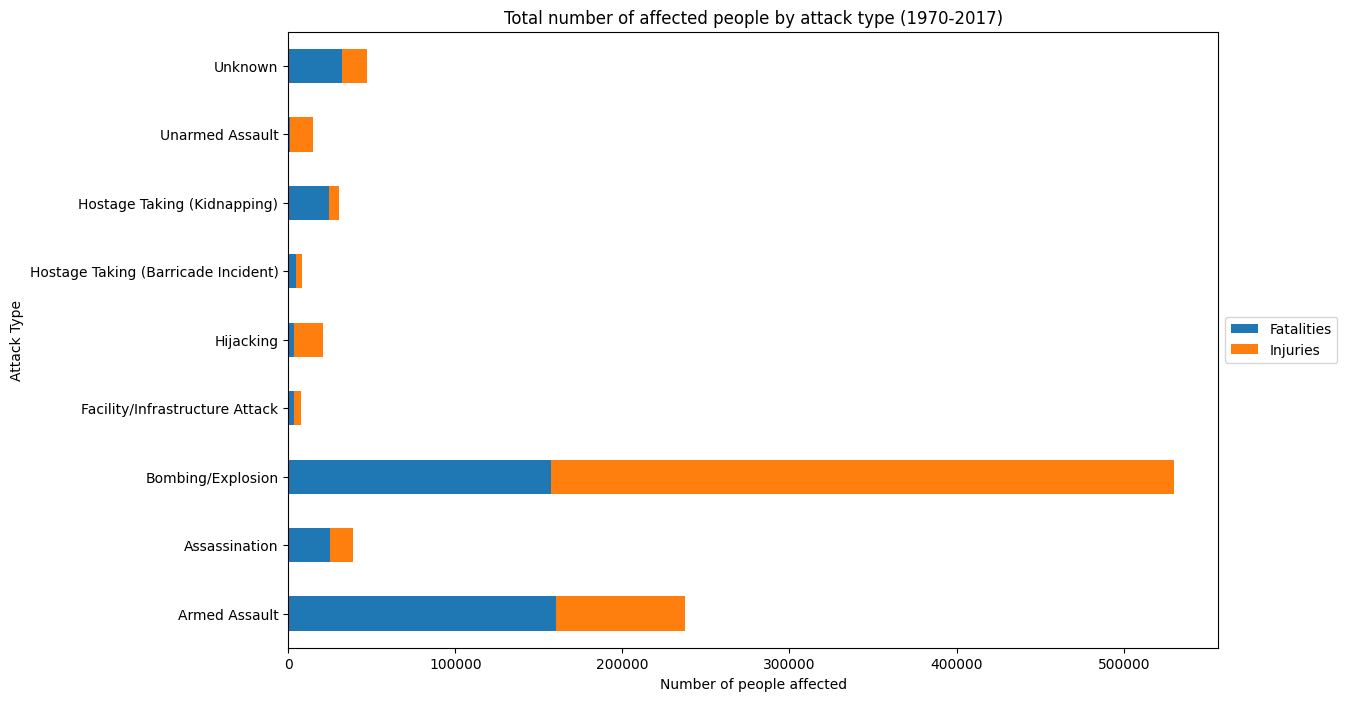

In [48]:
#create a dataframe with total number of killed and wounded people by attack type
casualties_df = df_wo_null.groupby('Attack_Type1').agg({'Fatalities':'sum', 'Injuries':'sum'}).reset_index()
casualties_df['total'] = casualties_df['Fatalities'] + casualties_df['Injuries']
casualties_df = casualties_df.sort_values(by=['total'], ascending=False).reset_index(drop=True)

#get the top 15 attack types
top_attack_types = casualties_df.head(15)['Attack_Type1'].tolist()

#create a new dataframe with data for the top 15 attack types
top_attack_types_df = df_wo_null[df_wo_null['Attack_Type1'].isin(top_attack_types)].groupby(['Attack_Type1'])['Fatalities','Injuries'].sum().reset_index()

#create a pivot table
pivot_table = pd.pivot_table(top_attack_types_df, values=['Fatalities','Injuries'], index='Attack_Type1', fill_value=0)

#create a stacked horizontal bar chart
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(12,8))
ax.set_xlabel('Number of people affected')
ax.set_ylabel('Attack Type')
ax.set_title('Total number of affected people by attack type (1970-2017)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


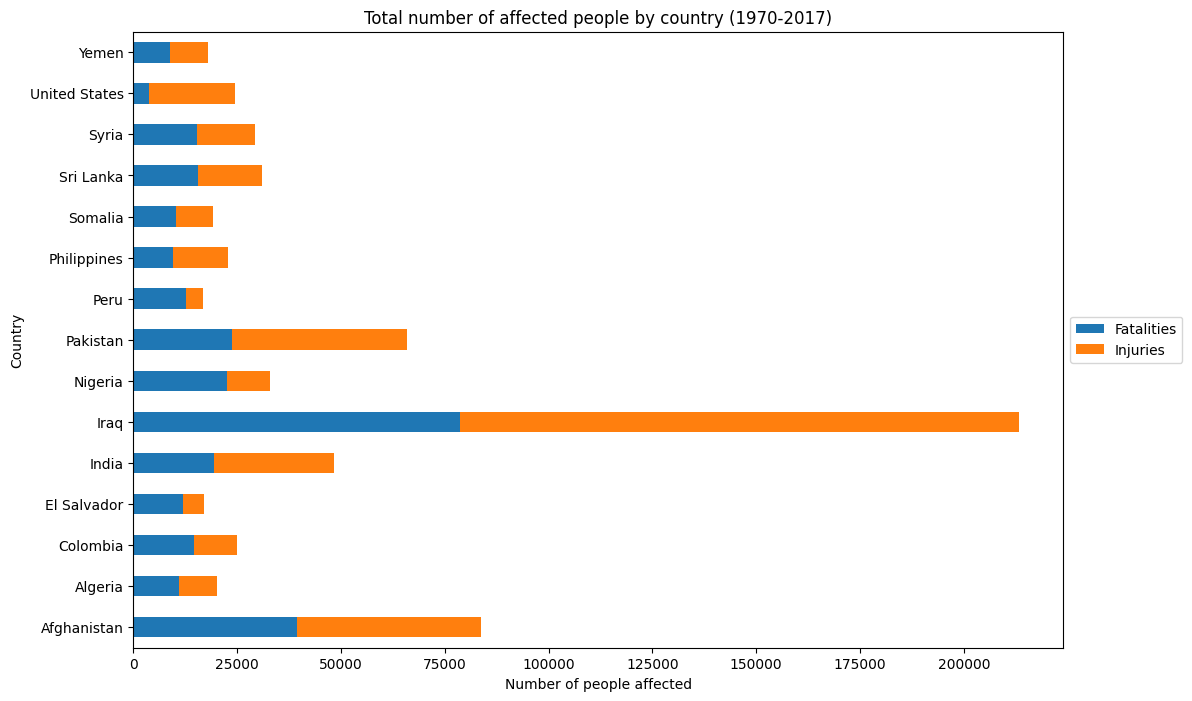

In [49]:
# create a dataframe with total number of killed and wounded people by country
casualties_df = df_wo_null.groupby('Country').agg({'Fatalities':'sum', 'Injuries':'sum'}).reset_index()
casualties_df['total'] = casualties_df['Fatalities'] + casualties_df['Injuries']
casualties_df = casualties_df.sort_values(by=['total'], ascending=False).reset_index(drop=True)

# get the top 10 countries
top_countries = casualties_df.head(15)['Country'].tolist()

# create a new dataframe with data for the top 10 countries
top_countries_df = df_wo_null[df_wo_null['Country'].isin(top_countries)].groupby(['Country'])['Fatalities','Injuries'].sum().reset_index()

# create a pivot table
pivot_table = pd.pivot_table(top_countries_df, values=['Fatalities','Injuries'], index='Country', fill_value=0)

# create a stacked horizontal bar chart
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(12,8))
ax.set_xlabel('Number of people affected')
ax.set_ylabel('Country')
ax.set_title('Total number of affected people by country (1970-2017)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

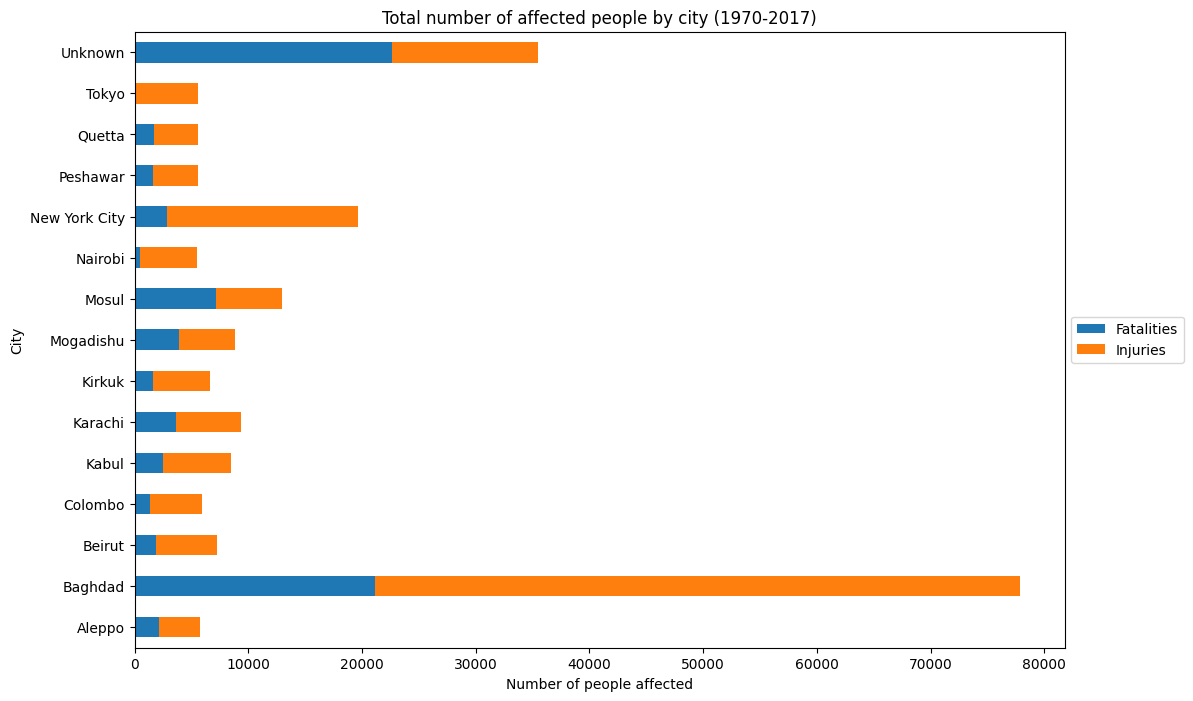

In [50]:
# creating a dataframe with total number of killed and injured people by city
casualties_df = df_wo_null.groupby('City').agg({'Fatalities':'sum', 'Injuries':'sum'}).reset_index()
casualties_df['total'] = casualties_df['Fatalities'] + casualties_df['Injuries']
casualties_df = casualties_df.sort_values(by=['total'], ascending=False).reset_index(drop=True)

# get the top 15 cities
top_cities = casualties_df.head(15)['City'].tolist()
top_cities_df = df_wo_null[df_wo_null['City'].isin(top_cities)].groupby(['City'])['Fatalities','Injuries'].sum().reset_index()

# creating a pivot table
pivot_table = pd.pivot_table(top_cities_df, values=['Fatalities','Injuries'], index='City', fill_value=0)

ax = pivot_table.plot(kind='barh', stacked=True, figsize=(12,8))
ax.set_xlabel('Number of people affected')
ax.set_ylabel('City')
ax.set_title('Total number of affected people by city (1970-2017)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

property damage wordcloud map

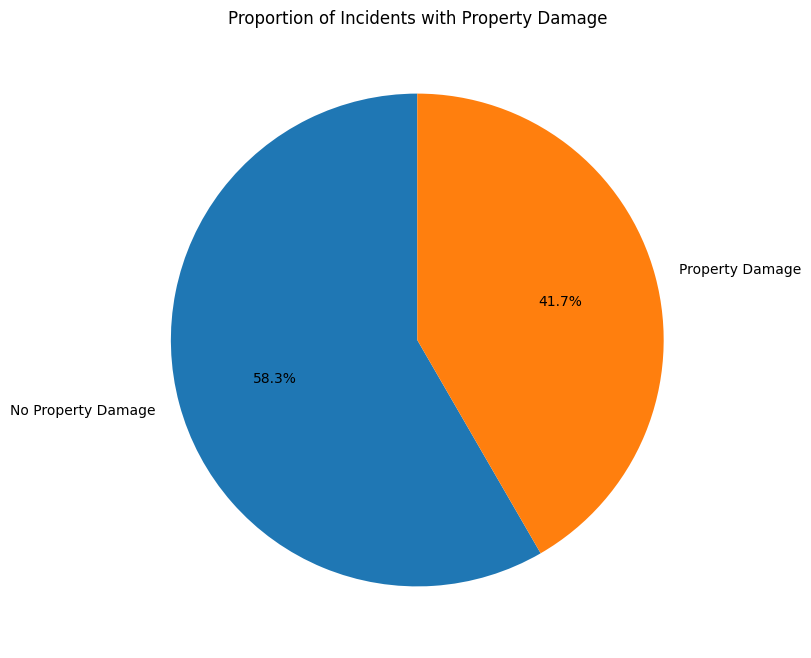

In [51]:
# Remove rows with property = -9
df_property = df_wo_null[df_wo_null['property'] != -9]

# Creating a binary column for property damage
df_property['property_bool'] = df_property['property'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Creating a pie chart
plt.figure(figsize=(8,8))
plt.pie(df_property['property_bool'].value_counts(), labels=['No Property Damage', 'Property Damage'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Incidents with Property Damage')
plt.show()

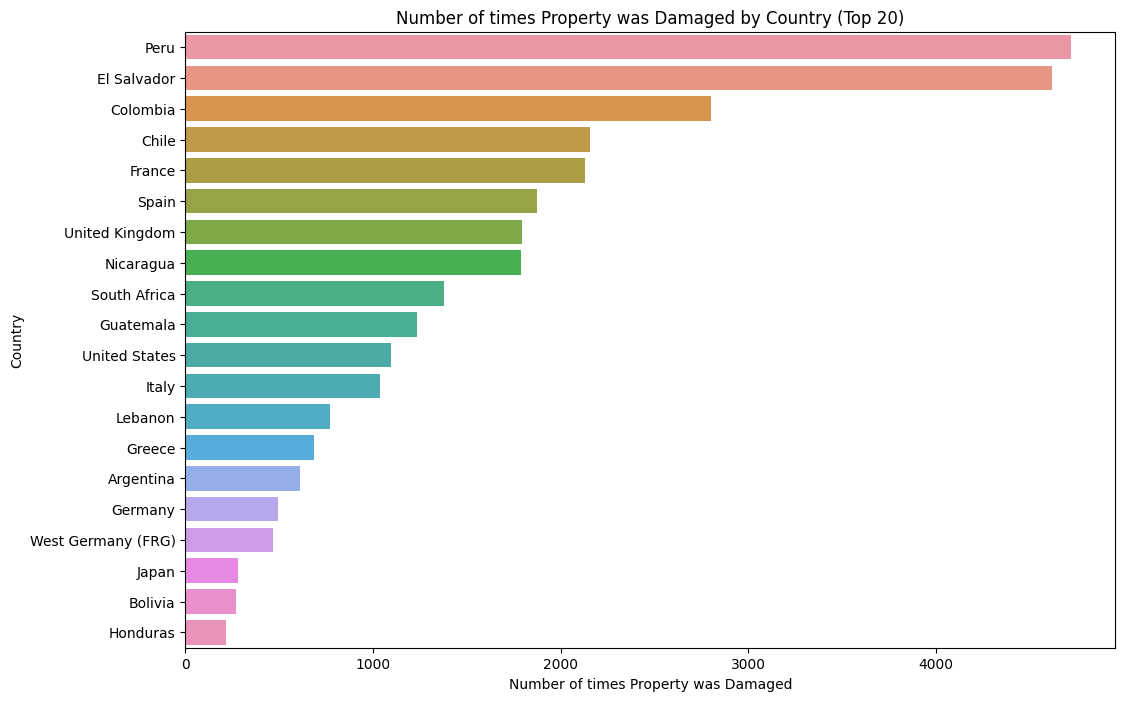

In [52]:
# Creating a dataframe with total number of property damage by country
property_damage_df = df_wo_null.groupby('Country').agg({'property':'sum'}).reset_index()
property_damage_df = property_damage_df.sort_values(by=['property'], ascending=False).reset_index(drop=True)

# Selecting top 20 countries
top_countries = property_damage_df.head(20)['Country'].tolist()
property_damage_df = property_damage_df[property_damage_df['Country'].isin(top_countries)]

# Creating a horizontal bar chart
plt.figure(figsize=(12,8))
sns.set_palette("husl")
sns.barplot(x='property', y='Country', data=property_damage_df)
plt.xlabel('Number of times Property was Damaged')
plt.ylabel('Country')
plt.title('Number of times Property was Damaged by Country (Top 20)')
plt.show()


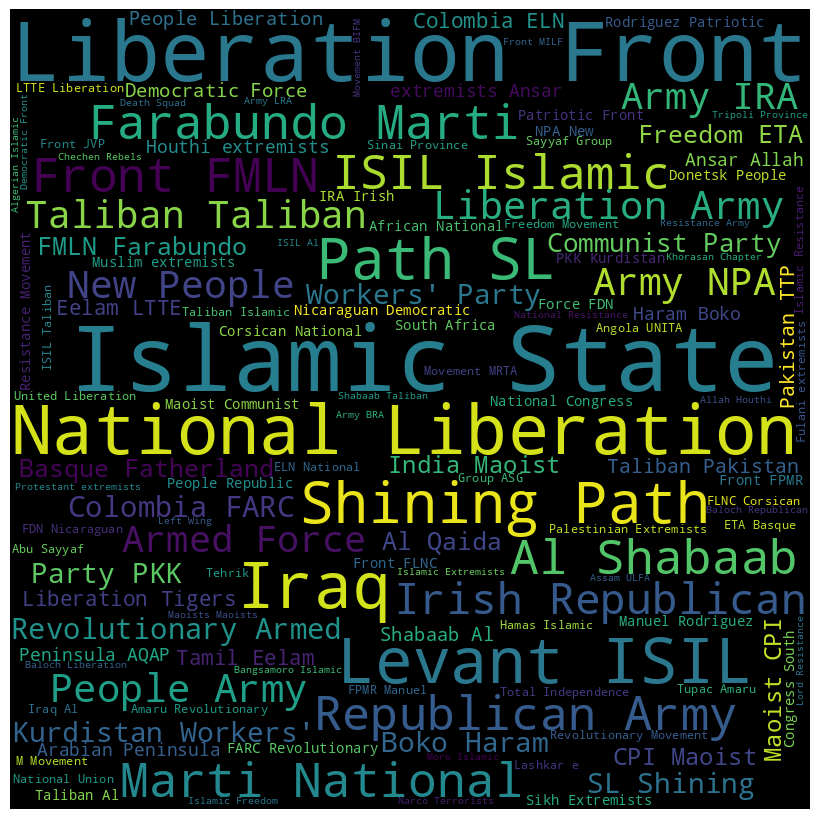

In [53]:
# Word cloud for terrorist group names

# Replace 'Unknown' with an empty string
df_wo_null['Group Name'] = df_wo_null['Group Name'].replace('Unknown', '')

# Get a string of all group names
group_names = ' '.join(df_wo_null['Group Name'].astype(str).tolist())

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(group_names)

# Ploting the word cloud
plt.figure(figsize=(8, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [54]:
# Drop rows with null values in latitude and longitude columns
df_wo_null = df_wo_null.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered on the world
map = folium.Map(location=[0, 0], zoom_start=2)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map)

# Group the attacks by country and count the number of attacks
country_attacks = df_wo_null.groupby('Country')['Year'].count().reset_index()
country_attacks.columns = ['Country', 'success']

# Add a marker for each country with the number of attacks as tooltip
for index, row in country_attacks.iterrows():
    country = row['Country']
    attacks = row['success']
    if pd.notnull(country):
        folium.Marker(location=[df_wo_null[df_wo_null['Country']==country]['Latitude'].mean(),
                                 df_wo_null[df_wo_null['Country']==country]['Longitude'].mean()],
                      tooltip=f'{country}: {attacks} attacks').add_to(marker_cluster)

# Show the map
map